In [44]:
import pandas as pd
df=pd.read_csv("Loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df.shape

(614, 13)

In [46]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [47]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [48]:
df=df.drop("Loan_ID",axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df=df.dropna()
df.shape

(480, 12)

In [50]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Married"]=df["Married"].map({"Yes":1,"No":0})
df["Dependents"]=df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Self_Employed"]=df["Self_Employed"].map({"Yes":1,"No":0})
df["Property_Area"]=df["Property_Area"].map({"Urban":1,"Semiurban":2,"Rural":3})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)
logistic_reg = LogisticRegression(solver='liblinear')
logistic_reg.fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.963855421686747 
TNR is: 0.4594594594594595
Confusion matrix is:
 [[ 34  40]
 [  6 160]]
Accuracy is: 0.8083333333333333


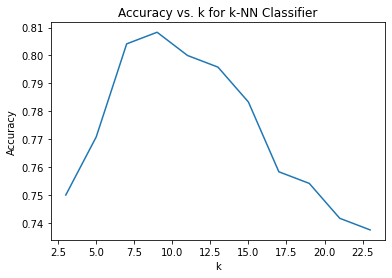

In [53]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

x=df.drop(columns=["Loan_Status"],axis=1)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
le = LabelEncoder()
y = le.fit_transform(df["Loan_Status"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=123)
accuracies=[]
k_values = [3,5,7,9,11,13,15,17,19,21,23]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-NN Classifier')
plt.show()  

In [54]:
k=k_values[accuracies.index(max(accuracies))]
print(k)

9


In [55]:
#KNN
x=df.drop(columns=["Loan_Status"],axis=1)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
le = LabelEncoder()
y = le.fit_transform(df["Loan_Status"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=123)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.9759036144578314 
TNR is: 0.43243243243243246
Confusion matrix is:
 [[ 32  42]
 [  4 162]]
Accuracy is: 0.8083333333333333


In [56]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)

NB_classifier = GaussianNB().fit(x_train, y_train)
y_pred = NB_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.9156626506024096 
TNR is: 0.5
Confusion matrix is:
 [[ 37  37]
 [ 14 152]]
Accuracy is: 0.7875


In [57]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(x_train,y_train)
y_pred = lda_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.963855421686747 
TNR is: 0.4864864864864865
Confusion matrix is:
 [[ 36  38]
 [  6 160]]
Accuracy is: 0.8166666666666667


In [58]:
#Quadratic discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(x_train,y_train)
y_pred = qda_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.9156626506024096 
TNR is: 0.527027027027027
Confusion matrix is:
 [[ 39  35]
 [ 14 152]]
Accuracy is: 0.7958333333333333


TPR is: 0.8072289156626506 
TNR is: 0.5135135135135135
Confusion matrix is:
 [[ 38  36]
 [ 32 134]]
Accuracy is: 0.7166666666666667


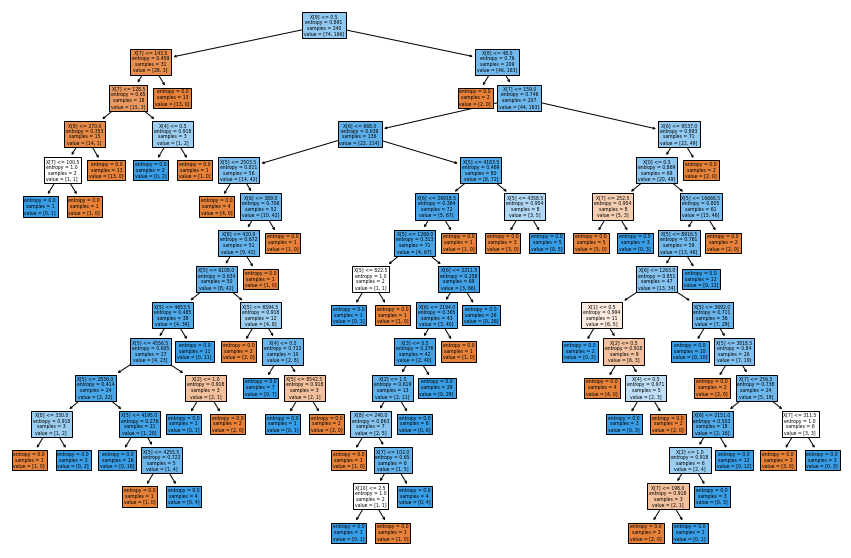

In [59]:
#Decision tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)

plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

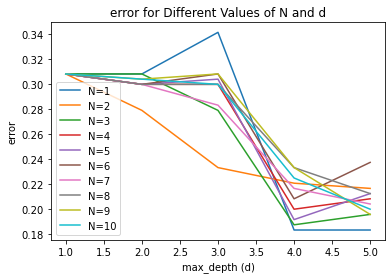

Best combination of N and d:
N = 1
d = 4
[[0.30833333333333335, 0.30833333333333335, 0.3416666666666667, 0.18333333333333335, 0.18333333333333335], [0.30833333333333335, 0.2791666666666667, 0.23333333333333328, 0.22083333333333333, 0.21666666666666667], [0.30833333333333335, 0.30833333333333335, 0.2791666666666667, 0.1875, 0.1958333333333333], [0.30833333333333335, 0.30000000000000004, 0.30000000000000004, 0.19999999999999996, 0.20833333333333337], [0.30833333333333335, 0.30000000000000004, 0.3041666666666667, 0.19166666666666665, 0.21250000000000002], [0.30833333333333335, 0.30000000000000004, 0.30833333333333335, 0.20833333333333337, 0.23750000000000004], [0.30833333333333335, 0.30000000000000004, 0.2833333333333333, 0.21666666666666667, 0.20416666666666672], [0.30833333333333335, 0.30000000000000004, 0.30000000000000004, 0.23333333333333328, 0.21250000000000002], [0.30833333333333335, 0.3041666666666667, 0.30833333333333335, 0.23333333333333328, 0.1958333333333333], [0.3083333333333

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)

errors=[]
a=0
N_best=None
d_best=None
for N in range(1,11):
        # Initialize lists to store accuracies for different d values
    errors_for_N = []
    for d in range(1,6):
        model = RandomForestClassifier(n_estimators=N,max_depth=d,criterion= "entropy",random_state=123)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy=accuracy_score(y_test, y_pred)
        errors_for_N.append(1-accuracy)
        
        if accuracy > a:
            a=accuracy
            N_best=N
            d_best=d
    errors.append(errors_for_N)
    
# Plot the accuracies for each N
for i, acc in enumerate(errors):
    plt.plot(range(1, 6), acc, label=f"N={i+1}")

# Add labels and title
plt.xlabel('max_depth (d)')
plt.ylabel('error')
plt.title('error for Different Values of N and d')
plt.legend()
plt.show()

# Print the best combination
print("Best combination of N and d:")
print("N =", N_best)
print("d =", d_best)
print(errors)

TPR is: 0.9698795180722891 
TNR is: 0.47297297297297297
Confusion matrix is:
 [[ 35  39]
 [  5 161]]
Accuracy is: 0.8166666666666667


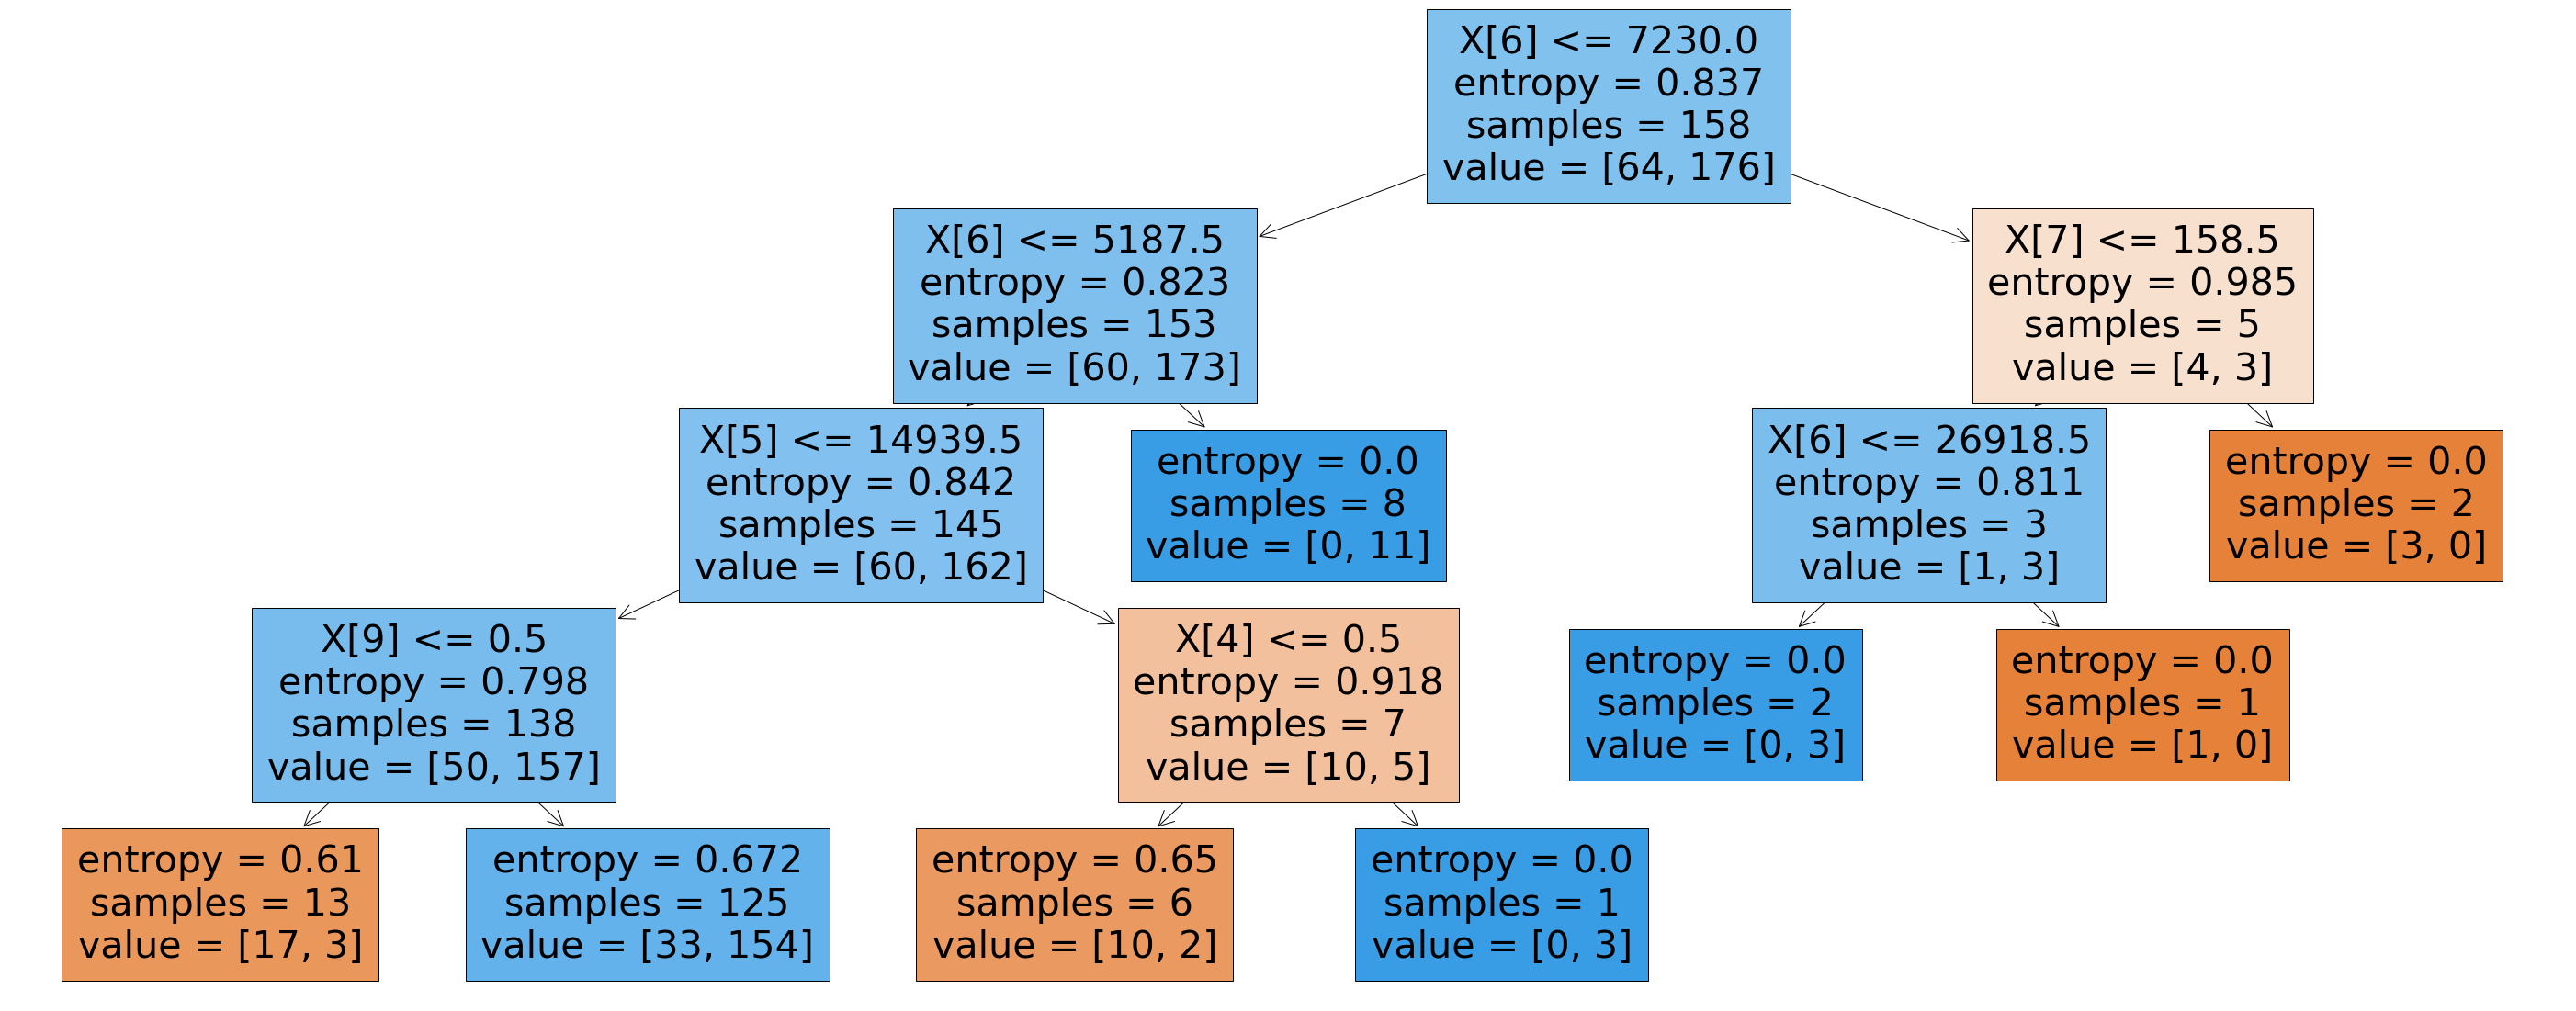

In [61]:
#Random forest classifier
from sklearn.tree import plot_tree

x=df.drop(columns=["Loan_Status"],axis=1)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)

model = RandomForestClassifier(n_estimators=1,max_depth=4,criterion= "entropy",random_state=123)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)

individual_tree = model.estimators_[0]

plt.figure(figsize=(50,20))
plot_tree(individual_tree, filled=True)

print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)
plt.show()

In [67]:
#SVM linear
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

x=df.drop(columns=["Loan_Status"],axis=1)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
le = LabelEncoder()
y = le.fit_transform(df["Loan_Status"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)
svm_classifier=svm.SVC(kernel="linear")
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.9759036144578314 
TNR is: 0.47297297297297297
Confusion matrix is:
 [[ 35  39]
 [  4 162]]
Accuracy is: 0.8208333333333333


In [68]:
#svm Guassian
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

x=df.drop(columns=["Loan_Status"],axis=1)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)

svm_classifier_2=svm.SVC(kernel="rbf")
svm_classifier_2.fit(x_train,y_train)
y_pred = svm_classifier_2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.9698795180722891 
TNR is: 0.4594594594594595
Confusion matrix is:
 [[ 34  40]
 [  5 161]]
Accuracy is: 0.8125


In [72]:
#svm degree 2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

x=df.drop(columns=["Loan_Status"],axis=1)
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
y=df["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)
svm_classifier_3=svm.SVC(kernel="poly",degree=2)
svm_classifier_3.fit(x_train,y_train)
y_pred = svm_classifier_3.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
a=confusion_matrix(y_test,y_pred)
TP=a[1,1]
TN=a[0,0]
FP=a[0,1]
FN=a[1,0]
# True Positive Rate (Sensitivity or Recall)
TPR = TP / (TP + FN)
# True Negative Rate (Specificity)
TNR = TN / (TN + FP)
print("TPR is:",TPR,"\nTNR is:",TNR)
print("Confusion matrix is:\n",a)
print("Accuracy is:",accuracy)

TPR is: 0.9457831325301205 
TNR is: 0.47297297297297297
Confusion matrix is:
 [[ 35  39]
 [  9 157]]
Accuracy is: 0.8


In [70]:
import pickle
pickle.dump(svm_classifier,open("loanpred.pkl","wb"))